In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from sklearn import linear_model
from scipy.special import expit

from sklearn.metrics import confusion_matrix
import scipy
from scipy.io import arff

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.externals import joblib

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut

from sklearn.decomposition import PCA

Fonte: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

### datasets de teste do SCikit learn
* Utilizando dataset de imagens 

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
china.shape

imshow -> plota um grafico bi dimensional, e para cada valor da matrix 2d, plota uma cor, calculada a partir do rgb

In [ ]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

* É uma image de 427x640 pixels, sendo cada pixel três valores correspondente ao RGB

In [ ]:
china.shape

* Os valores de RGB variam de 0 a 255. Dessa forma, os valores nessa matriz são entre 0 a 255, dividindo todo valor por 255, obtemos uma escala entre 0 a 1
* Em seguida os dados foram redimensionados, de 2D para 1D (apenas mudança de posição dos dados, não altera o conteúdo)

In [ ]:
data = china / 255.0 # Refazendo para escala entre 0 a 1
data = data.reshape(427 * 640, 3) # transformando o formato de dados 2D para 1D, apenas mudança de representação
data.shape

In [ ]:
print(data)

### Função para plotar o valor de cada pixel em duas dimensões

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    print(rng)
    i = rng.permutation(data.shape[0])[:N]
    print(i)
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

### Usando Kmeans para encontrar 16 grupos
* O predict está sendo usado para colocar todos os itens em um dos 16 clusters

In [ ]:
data

In [ ]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)

kmeans.cluster_centers_

In [ ]:
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")


In [ ]:
new_colors

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

### PCA Principal Component Analysis
* Variância e covariância são uma medida do “espalhamento” de um conjunto de pontos ao redor do centro de massa (média)
* Variância - medida do desvio da média para pontos em uma dimensão, por exemplo alturas
* Covariância como uma medida de quanto cada uma das dimensões variam da média em relação um ao outro.
* A covariância é medida entre 2 dimensões para verificar se existe uma relação entre as 2 dimensões. 
    * Ex:  número de horas estudado e notas obtidas.
* A covariância entre uma dimensão e ela mesma é a variancia


### Matriz de covariância
* É uma matriz quadrada de tamanho igual a quantidade de linhas
* A diagonal principal mostra a variância


### Interpretando covariância

* Um valor positivo de covariância indica ambos dimensões aumentam ou diminuem juntas. 

* Um valor negativo indica enquanto um aumenta a outras diminuições ou vice-versa 

* Se a covariância for zero: as duas dimensões são independentes um do outro

* Cálculos de covariância são usados para encontrar relações em conjuntos de dados com muitas  dimensões (geralmente maiores que 3) onde a visualização é difícil

### O exemplo de dados abaixo mostra um dataset com três colunas
* As linhas são uma função da primeira linhas multiplicada por um escalar
* A Seguir a matriz de coraviancia

In [ ]:
x = np.array([[1, 2,3], [2, 4,6], [4, 8, 12], [3, 6, 9], [3, 6, 9], [5, 10, 15], [6, 12, 18]])
np.cov(x)

### A figura abaixo mostra uma linha com os pontos determinados pelas 3 dimensões

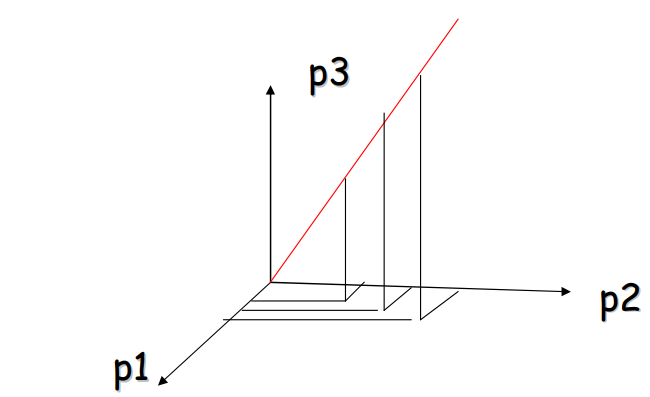

* Considere um novo sistema de coordenadas em que um dos eixos está na direção dessa linha
* Um dos eixos pode entao ser usado para definir os outros dois

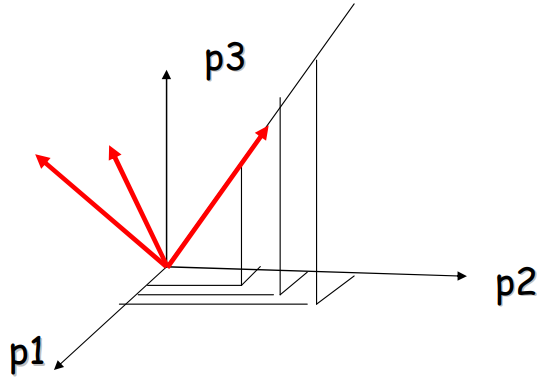

* Análise de componentes principais (PCA) é uma técnica usada para simplificar um conjunto de dados
* É uma transformação linear que escolhe uma nova sistema de coordenadas para o conjunto de dados maior variação por qualquer projeção dos dados 
* O conjunto com maior variancia fica no primeiro eixo (então chamado de primeiro componente principal),
    * A segunda maior variância no segundo eixo, e assim por diante.
* O PCA pode ser usado para reduzir a dimensionalidade, eliminando os componentes principais posteriores.

#### Considere o conjunto de pontos a seguir
* 200 pontos aleatórios em duas dimensões

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

* Há uma relação  linear entre as variáveis x e y. 


* O problema de aprendizado não supervisionado tenta aprender sobre a relação entre os valores x e y. 
    * Contrapondo a tentar prever os valores de y a partir dos valores de x

* Na análise de componentes principais (PCA), esse relacionamento é quantificado encontrando uma lista dos eixos principais nos dados e usando esses eixos para descrever o conjunto de dados. 

* Usando o estimador PCA do Scikit-Learn:

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)

In [ ]:
print(pca.components_)

In [ ]:
print(pca.explained_variance_)

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');



Esses vetores representam os principais eixos dos dados, e o comprimento do vetor é uma indicação de quão "importante" esse eixo é na descrição da distribuição dos dados 
* Mais precisamente, é uma medida da variação dos dados quando projetados. 
* Nesse eixo. A projeção de cada ponto de dados nos eixos principais são os "componentes principais" dos dados.

* O uso do PCA para redução de dimensionalidade envolve zerar um ou mais dos menores componentes principais
 * Resultando em uma projeção em dimensão mais baixa dos dados que preserva a variação máxima dos dados.
* Abaixo é mostrado o uso do PCA

In [ ]:
#pca = PCA(n_components=1)
pca = PCA(0.1)

pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

* Os dados transformados foram reduzidos para uma única dimensão. 
* Podemos realizar a transformação inversa desses dados reduzidos
* Gráfico comparando dados transformados com dados reduzidos

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [ ]:
print(pca.explained_variance_)

Este conjunto de dados de dimensão reduzida é, em alguns sentidos, "bom o suficiente" para codificar os relacionamentos mais importantes entre os pontos: apesar de reduzir a dimensão dos dados em 50%, o relacionamento geral entre os pontos de dados é principalmente preservado.

### Teste de PCA com base mnist

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

In [ ]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[4]) 
plt.show() 

In [ ]:
pca = PCA(50)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Escolhendo número de dimensões para PCA

In [ ]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

### Gerando ruído aleatódio nos dados

In [ ]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

### TRansformando com PCA mantendo 50% da variância
* Foi gerado 12 componentes nesse caso

In [ ]:
pca = PCA(0.50).fit(noisy)
pca.n_components_


### Transformação inversa reduziu ruídos

In [ ]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)


### Exemplo de uso de PCA para identificação de faces

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.target.shape)
print(faces.images.shape)
print(faces.data.shape)

In [ ]:
pca = PCA(150)
pca.fit(faces.data)

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')


In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [ ]:
# Compute the components and projected faces
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

### Testes usando PCA antes de classificar

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data.target.shape)
print(data.data.shape)
X=data.data
y=data.target


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

sgd_clf = KNeighborsClassifier(n_neighbors=3)

sgd_clf.fit(X_train, y_train)

y_pred = sgd_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))

In [ ]:
pca = PCA(2)
pca.fit(X)
XPCA = pca.transform(X)

print(XPCA.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(XPCA[:,0], XPCA[:,1])

y=data.target

X_train, X_test, y_train, y_test = train_test_split(XPCA,y, test_size=0.1)

sgd_clf = KNeighborsClassifier(n_neighbors=3)

sgd_clf.fit(X_train, y_train)

y_pred = sgd_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))

### Pipeline de classificação com PCA

In [ ]:
heart = pd.read_csv('SAheart.data')

le = preprocessing.LabelEncoder()
heart['famhist_label'] = le.fit_transform(heart['famhist'])
heart.drop('famhist', axis=1, inplace=True)

print(heart.head())


X = heart[['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age','famhist_label']] 
y = heart[['chd']] 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15)

In [ ]:
#pipe_knn = Pipeline([('scl', StandardScaler()), ('clf', KNeighborsClassifier())])
pipetree = Pipeline([ ('scl', StandardScaler()), ('pca', PCA(0.1)), ('clf', DecisionTreeClassifier())])

#pipe = [pipe_knn, pipetre]
pipe = [pipetree]

param_range = [1, 2,3 ,4]

# grid search params
#grid_params = [{'clf__criterion': ['gini', 'entropy'],
#               'clf__presort': [True, False]}]
grid_params = [{'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_leaf': param_range,
    'clf__max_depth': param_range,
    'clf__min_samples_split': param_range[1:],
    'clf__presort': [True, False]}]

# Construct grid search
gs = GridSearchCV(estimator=pipetree,
    param_grid=grid_params,
    scoring='accuracy')

# Fit using grid search
gs.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

### Exemplo com Pipeline

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'])

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
#        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', Ridge())
        ])

In [ ]:
pipe = pipe.fit(X_train, y_train)
print('Testing score: ', pipe.score(X_test, y_test))

In [ ]:
print(pipe.steps[0][1].explained_variance_)

In [ ]:
### Exemplo com grisearchCV

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("sign_mnist_train.csv", header=0)

In [17]:
train_df.shape

(27455, 784)

In [3]:
labels = train_df["label"].values

In [4]:
train_df.drop(["label"], inplace=True, axis=1)

In [5]:
images = np.array(train_df.iloc[:, :])
images = np.array([np.reshape(i, (28, 28)) for i in images])
images_flat = np.array([i.flatten() for i in images])

In [6]:
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images_flat)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images_scaled, labels, test_size=0.25, random_state=42)


In [8]:
pca = PCA(n_components=120)

In [9]:
forest = RandomForestClassifier(n_estimators=20)

In [10]:
pipe = Pipeline(steps=[('pca', pca), ('forest', forest)])

In [15]:
param_dict = {"pca__n_components":[60, 100],
              "forest__n_estimators":[20, 30]}

estimator = GridSearchCV(pipe,
                         param_dict,
                         verbose=2)

In [11]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=120,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('forest',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=20, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0

In [12]:
test_predictions = pipe.predict(X_test)
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}%".format(precision))

Accuracy with RandomForest: 100.000000%


In [16]:
estimator.fit(X_train, y_train)

/home/silvio/.conda/envs/trackml6/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] forest__n_estimators=20, pca__n_components=60 ...................
[CV] .... forest__n_estimators=20, pca__n_components=60, total=   6.8s
[CV] forest__n_estimators=20, pca__n_components=60 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] .... forest__n_estimators=20, pca__n_components=60, total=   7.0s
[CV] forest__n_estimators=20, pca__n_components=60 ...................
[CV] .... forest__n_estimators=20, pca__n_components=60, total=   6.7s
[CV] forest__n_estimators=20, pca__n_components=100 ..................
[CV] ... forest__n_estimators=20, pca__n_components=100, total=   8.0s
[CV] forest__n_estimators=20, pca__n_components=100 ..................
[CV] ... forest__n_estimators=20, pca__n_components=100, total=   8.1s
[CV] forest__n_estimators=20, pca__n_components=100 ..................
[CV] ... forest__n_estimators=20, pca__n_components=100, total=   8.2s
[CV] forest__n_estimators=30, pca__n_components=60 ...................
[CV] .... forest__n_estimators=30, pca__n_components=60, total=   8.8s
[CV] forest__n_estimators=30, pca__n_components=60 ...................
[CV] .... forest__n_estimators=30, pca__n_components=60, total=   9.0s
[CV] forest__n_estimators=30, pca__n_components=60 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=120, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('forest',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,...
                  